# INM434 Natural Language Processing Final Report

## By Ho Yin Tam

Import the library.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Import the training set and test set.

In [10]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

Convert the X_train to series data type.

In [11]:
X_train_text = X_train['text']
X_test_text = X_test['text']

Reshape the target label of y_train and y_test.

In [12]:
y_train_reshape = np.ravel(y_train)
y_test_reshape = np.ravel(y_test)

### Baseline model

### Feature extraction

Count vectorizer.

In [28]:
# Initiate the count vectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the text data 
X_train_count = count_vectorizer.fit_transform(X_train_text)
X_test_count = count_vectorizer.transform(X_test_text)

# Convert it for modelling
X_train_count_array = X_train_count.toarray()
X_test_count_array = X_test_count.toarray()

Initiate the Naive bayes classifier and train the model with the training set.

In [29]:
# Initiate the Naive Bayes classifier 
nb_count = MultinomialNB()

# Train the model with the training set
nb_count.fit(X_train_count_array, y_train_reshape)

MultinomialNB()

Use the test set to predict.

In [30]:
# Use the test set to predict
y_pred_count = nb_count.predict(X_test_count_array)
y_pred_count

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0], dtype=int64)

Compute the confusion matrix and visualize it.

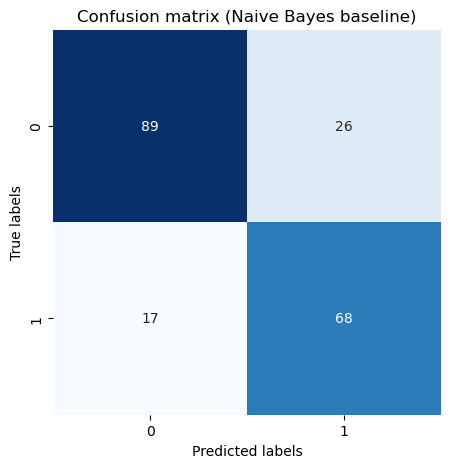

In [32]:
nb_count_cm = confusion_matrix(y_pred_count, y_test_reshape)
plt.figure(figsize = (5,5))
sns.heatmap(nb_count_cm, annot = True, cmap = 'Blues', cbar = False)
plt.title('Confusion matrix (Naive Bayes baseline)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Compute accuracy, precision, recall, and F1 score of the baseline.

In [33]:
# Compute accuracy, precision, recall, and F1 score of the baseline
nb_accuracy_count = accuracy_score(y_pred_count, y_test_reshape)
nb_precision_count = precision_score(y_pred_count, y_test_reshape)
nb_recall_count = recall_score(y_pred_count, y_test_reshape)
nb_f1score_count = f1_score(y_pred_count, y_test_reshape)

# Display the result
print('Accuracy of Naive Bayes baseline:', nb_accuracy_count)
print('Precision of Naive Bayes baseline:', nb_precision_count)
print('Recall of Naive Bayes baseline:', nb_recall_count)
print('F1 score of Naive Bayes baseline:', nb_f1score_count)

Accuracy of Naive Bayes baseline: 0.785
Precision of Naive Bayes baseline: 0.723404255319149
Recall of Naive Bayes baseline: 0.8
F1 score of Naive Bayes baseline: 0.7597765363128491


Visualize the receiver operating characteristic (ROC) curve and compute the value of area under the curve (AUC).

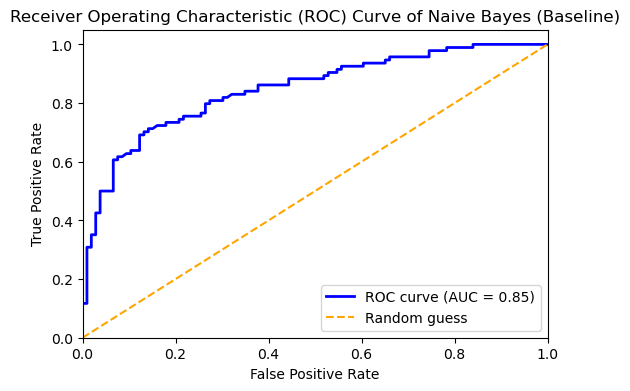

In [37]:
# Compute the value of area under the curve (AUC)
y_test_prob_count = nb_count.predict_proba(X_test_count_array)[:,1]
nb_count_fpr, nb_count_tpr, nb_count_thresholds = roc_curve(y_test_reshape, y_test_prob_count)
nb_count_auc = auc(nb_count_fpr, nb_count_tpr)

# Plot receiver operating characteristic (ROC) curve
plt.figure(figsize = (6, 4))
plt.plot(nb_count_fpr, nb_count_tpr, color = 'blue', lw = 2, label = 'ROC curve (AUC = %0.2f)' % nb_count_auc)
plt.plot([0, 1], [0, 1], color = 'orange', linestyle = '--', label = 'Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Naive Bayes (Baseline)')
plt.legend(loc = 'lower right')
plt.show()

### Version using TF-IDF to extract features and ten fold cross validation to train the model 

### Feature extraction

TF-IDF.

In [40]:
# Initiate the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data 
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# Convert it for modelling
X_train_tfidf_array = X_train_tfidf.toarray()
X_test_tfidf_array = X_test_tfidf.toarray()

Perform 10-fold cross validation.

In [43]:
# Initiate the logistic regression model 
nb_tfidf = MultinomialNB()

# Perform 10-fold cross validation
nb_scores = cross_val_score(nb_tfidf, X_train_tfidf_array, y_train_reshape, cv = 10, scoring = 'accuracy')

# Display the cross validation score
print('Cross validation score:', nb_scores)

# Compute the mean of cross validation score and display it
nb_mean_score = np.mean(nb_scores)
print('Mean of cross validation score:', nb_mean_score)

# Train the Naive Bayes classifier on the entire training set
nb_tfidf.fit(X_train_tfidf_array, y_train_reshape)

Cross validation score: [0.7875     0.7875     0.6625     0.8        0.8125     0.8
 0.73417722 0.72151899 0.73417722 0.75949367]
Mean of cross validation score: 0.7599367088607595


MultinomialNB()

Use the best model and test set to predict.

In [45]:
# Use the test set to predict
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
y_pred_tfidf

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0], dtype=int64)

Compute the confusion matrix and visualize it.

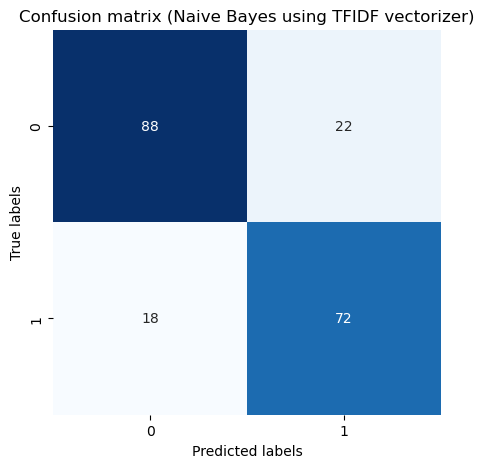

In [46]:
nb_tfidf_cm = confusion_matrix(y_pred_tfidf, y_test_reshape)
plt.figure(figsize = (5,5))
sns.heatmap(nb_tfidf_cm, annot = True, cmap = 'Blues', cbar = False)
plt.title('Confusion matrix (Naive Bayes using TFIDF vectorizer)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Compute accuracy, precision, recall, and F1 score.

In [48]:
# Compute accuracy, precision, recall, and F1 score
nb_accuracy_tfidf = accuracy_score(y_pred_tfidf, y_test_reshape)
nb_precision_tfidf = precision_score(y_pred_tfidf, y_test_reshape)
nb_recall_tfidf = recall_score(y_pred_tfidf, y_test_reshape)
nb_f1score_tfidf = f1_score(y_pred_tfidf, y_test_reshape)

# Display the result
print('Accuracy of logistic regression baseline:', nb_accuracy_tfidf)
print('Precision of logistic regression baseline:', nb_precision_tfidf)
print('Recall of logistic regression baseline:', nb_recall_tfidf)
print('F1 score of logistic regression baseline:', nb_f1score_tfidf)

Accuracy of logistic regression baseline: 0.8
Precision of logistic regression baseline: 0.7659574468085106
Recall of logistic regression baseline: 0.8
F1 score of logistic regression baseline: 0.7826086956521738


Visualize the receiver operating characteristic (ROC) curve and compute the value of area under the curve (AUC).

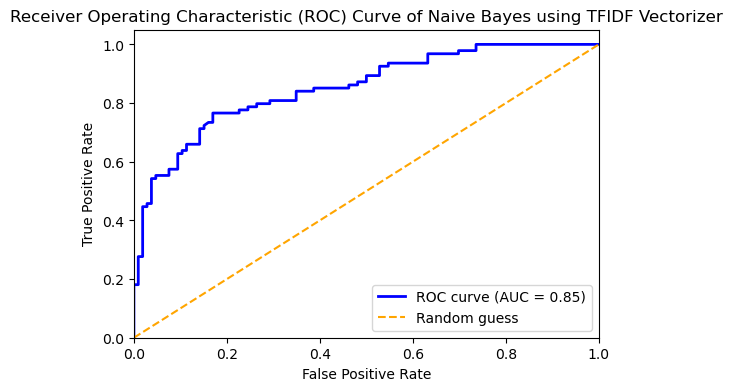

In [49]:
# Compute the value of area under the curve (AUC)
y_test_prob_tfidf = nb_tfidf.predict_proba(X_test_tfidf_array)[:,1]
nb_tfidf_fpr, nb_tfidf_tpr, nb_tfidf_thresholds = roc_curve(y_test_reshape, y_test_prob_tfidf)
nb_tfidf_auc = auc(nb_tfidf_fpr, nb_tfidf_tpr)

# Plot receiver operating characteristic (ROC) curve
plt.figure(figsize = (6, 4))
plt.plot(nb_tfidf_fpr, nb_tfidf_tpr, color = 'blue', lw = 2, label = 'ROC curve (AUC = %0.2f)' % nb_tfidf_auc)
plt.plot([0, 1], [0, 1], color = 'orange', linestyle = '--', label = 'Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Naive Bayes using TFIDF Vectorizer')
plt.legend(loc = 'lower right')
plt.show()

### Error analysis

In [52]:
# Get the indices 
misclassified1_indices = (y_pred_tfidf == 1) & (y_test_reshape == 0)

# Extract the examples that are misclassified to positive
misclassified1_examples = X_test_text[misclassified1_indices]
print(len(misclassified1_examples))
print(misclassified1_examples)

18
30                                        hour seriously
33     go far many place ive never seen restaurant se...
39                                      even hello right
54     furthermore cant even find hour operation website
57                                 greasy unhealthy meal
59                                              disgrace
97                        chain im fan beat place easily
98     immediately said wanted talk manager want talk...
102    problem charge sandwich bigger subway sub offe...
103                                                thing
105                  pale color instead nice char flavor
120    ambiance feel like buffet setting douchey indo...
122               bar vega ever recall charged tap water
140              checked place couple year ago impressed
141                                 place honestly blown
158                                    small worth price
165    ive better dedicated boba tea spot even jenni pho
166                      buf

In [53]:
# Get the indices 
misclassified0_indices = (y_pred_tfidf == 0) & (y_test_reshape == 1)

# Extract the examples that are misclassified to positive
misclassified0_examples = X_test_text[misclassified0_indices]
print(len(misclassified0_examples))
print(misclassified0_examples)

22
2                                                   back
10     deal included tasting drink jeff went beyond e...
18                           would recommend saving room
21                much better ayce sushi place went vega
51              highquality chicken chicken caesar salad
58                               conclusion filling meal
62                                  sushi strip place go
63                                       one bite hooked
70                                             complaint
71           got enjoy seafood salad fabulous vinegrette
81                                           worth drive
90                                wed definitely go back
95     went bachi burger friend recommendation disapp...
124    sure order dessert even need pack togo tiramis...
129                      could eat bruschetta day devine
135                goat taco didnt skimp meat wow flavor
142       point finger item menu order wont disappointed
181                         